In [1]:
import EOSutils as meos

import numpy as np
import matplotlib.pyplot as plt

import matplotlib.style
import matplotlib as mpl
import matplotlib.colors as colors
import matplotlib.cm as cmx
from mpl_toolkits.axes_grid1 import make_axes_locatable

mpl.style.use('classic')

from astropy.table import Table
from astropy import units as u
from astropy.constants import G

import mesa_helper as mh
import os
import shutil
import copy

from scipy import interpolate
from scipy.linalg import lstsq as scipy_lstsq
from scipy.ndimage import gaussian_filter
import scipy.integrate as integrate
import decimal 

%matplotlib inline

In [2]:
profiles = meos.load_sample_planet_profiles(Minit=np.array((1.09,7.59,20.0)), Rinit=2.0, Zinit=0.025, comps=['uniform','inert_core'], Sinit=np.array((9.0,11.0)), alphas=2.0, ages=np.array((1.e6,1.e10)))


In [3]:
cms19_H = meos.CMStable("../2021_chabrier+_tables/TABLE_H_Trho_v1",units='cgs')


/Users/emily/Documents/astro/giant_planets/MESA_EoS/EOSutils/EOSutils/EOSutils.py:710: RuntimeWarning: overflow encountered in power
  self.Fgrid = 10**self.log10Ugrid - ((10**self.log10Tgrid) * (10**self.log10Sgrid))
/Users/emily/Documents/astro/giant_planets/MESA_EoS/EOSutils/EOSutils/EOSutils.py:710: RuntimeWarning: invalid value encountered in subtract
  self.Fgrid = 10**self.log10Ugrid - ((10**self.log10Tgrid) * (10**self.log10Sgrid))
/Users/emily/Documents/astro/giant_planets/MESA_EoS/EOSutils/EOSutils/EOSutils.py:717: RuntimeWarning: invalid value encountered in log10
  self.log10Fgrid = np.log10(self.Fgrid)
/Users/emily/Documents/astro/giant_planets/MESA_EoS/EOSutils/EOSutils/EOSutils.py:718: RuntimeWarning: invalid value encountered in log10
  self.F_log10Pgrid = np.log10(self.F_Pgrid)
/Users/emily/Documents/astro/giant_planets/MESA_EoS/EOSutils/EOSutils/EOSutils.py:719: RuntimeWarning: invalid value encountered in log10
  self.F_log10Sgrid = np.log10(self.F_Sgrid)
/Users/emil

In [4]:
print(np.shape(cms19_H.dF_drho_T))
print(np.shape(cms19_H.dF_dT_rho))

(281, 121)
(281, 121)


In [5]:
dF2_drho2, dF2_drho_dT = meos.finite_difference_single_grid(grid = cms19_H.dF_drho_T, log10rhogrid = cms19_H.log10rhogrid, log10Tgrid = cms19_H.log10Tgrid)

dF2_dT_drho, dF2_dT2 = meos.finite_difference_single_grid(grid = cms19_H.dF_dT_rho, log10rhogrid = cms19_H.log10rhogrid, log10Tgrid = cms19_H.log10Tgrid)
    

/var/folders/vr/5jyx18rn3vb6ccm0db12sp8w0000gn/T/ipykernel_36358/3922628250.py:4: RuntimeWarning: invalid value encountered in log10
  zs=[np.log10(dF2_drho_dT),np.log10(dF2_dT_drho),(dF2_drho_dT-dF2_dT_drho)/(dF2_dT_drho)],
/Users/emily/Documents/astro/giant_planets/MESA_EoS/EOSutils/EOSutils/EOSutils.py:1091: UserWarning: The following kwargs were not used by contour: 'shading'
  cs = axes[i,j].contourf(xs[i*nCol + j], ys[i*nCol + j], zs[i*nCol + j], shading='nearest', cmap=cmap[i*nCol + j], levels=np.linspace(zlims[i*nCol+j][0],zlims[i*nCol+j][1],levels[i*nCol+j]))


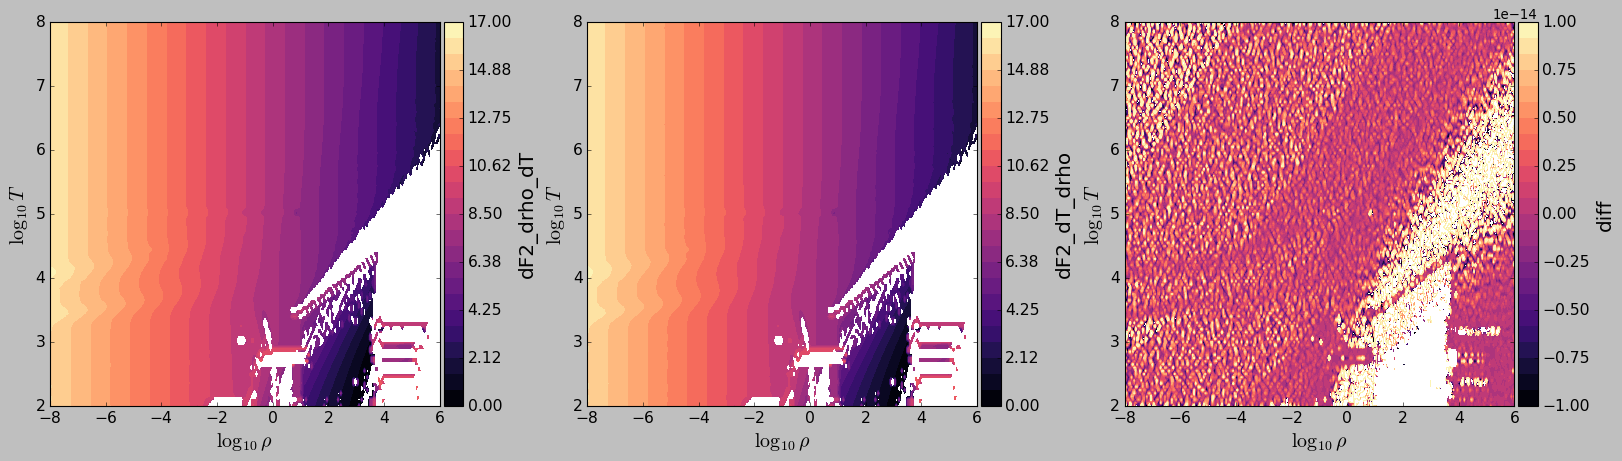

In [6]:
meos.contourf_sublots_with_colorbars(nRow=1, nCol=3, 
                                xs=cms19_H.log10rhogrid,
                                ys=cms19_H.log10Tgrid,
                                zs=[np.log10(dF2_drho_dT),np.log10(dF2_dT_drho),(dF2_drho_dT-dF2_dT_drho)/(dF2_dT_drho)],
                                xlims=(-8,6),
                                ylims=(2,8),
                                zlims=[(0,17),(0,17),(-1.e-14,1.e-14)],
                                levels=25,
                                xlabels=r'$\log_{10}\rho$',
                                ylabels=r'$\log_{10}T$',
                                zlabels=['dF2_drho_dT','dF2_dT_drho','diff'],
                                cmap='magma', vlines=None, hlines=None, otherlines_x=None, otherlines_y=None, 
                                species='H', plot_interpolation_lines=False, savename=None)



/var/folders/vr/5jyx18rn3vb6ccm0db12sp8w0000gn/T/ipykernel_36358/2988437882.py:1: RuntimeWarning: overflow encountered in power
  dE_drho, dE_dT = meos.finite_difference_single_grid(grid = 10**cms19_H.log10Ugrid, log10rhogrid = cms19_H.log10rhogrid, log10Tgrid = cms19_H.log10Tgrid)
/var/folders/vr/5jyx18rn3vb6ccm0db12sp8w0000gn/T/ipykernel_36358/2988437882.py:2: RuntimeWarning: overflow encountered in power
  dS_drho, dS_dT = meos.finite_difference_single_grid(grid = 10**cms19_H.log10Sgrid, log10rhogrid = cms19_H.log10rhogrid, log10Tgrid = cms19_H.log10Tgrid)
/var/folders/vr/5jyx18rn3vb6ccm0db12sp8w0000gn/T/ipykernel_36358/2988437882.py:10: RuntimeWarning: divide by zero encountered in log10
  zs=[np.log10(LHS),np.log10(RHS),(LHS-RHS)/(LHS)],
/var/folders/vr/5jyx18rn3vb6ccm0db12sp8w0000gn/T/ipykernel_36358/2988437882.py:10: RuntimeWarning: invalid value encountered in log10
  zs=[np.log10(LHS),np.log10(RHS),(LHS-RHS)/(LHS)],
/var/folders/vr/5jyx18rn3vb6ccm0db12sp8w0000gn/T/ipykernel_36

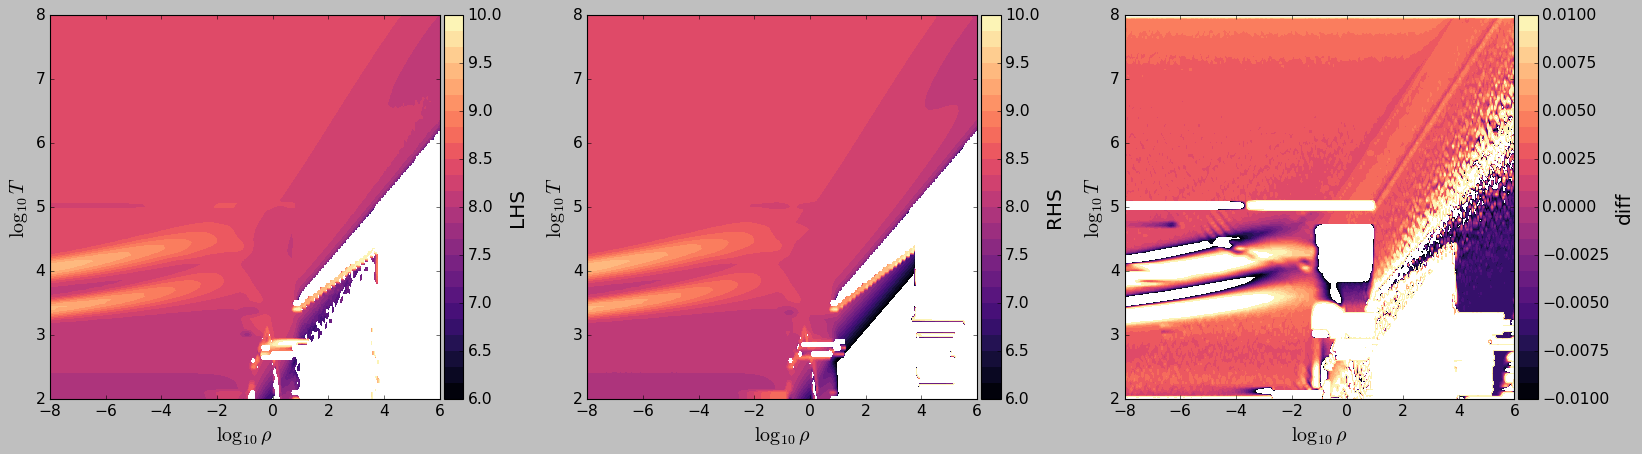

In [16]:
dE_drho, dE_dT = meos.finite_difference_single_grid(grid = 10**cms19_H.log10Ugrid, log10rhogrid = cms19_H.log10rhogrid, log10Tgrid = cms19_H.log10Tgrid)
dS_drho, dS_dT = meos.finite_difference_single_grid(grid = 10**cms19_H.log10Sgrid, log10rhogrid = cms19_H.log10rhogrid, log10Tgrid = cms19_H.log10Tgrid)

LHS = dE_dT
RHS = dS_dT * 10**cms19_H.log10Tgrid

meos.contourf_sublots_with_colorbars(nRow=1, nCol=3, 
                                xs=cms19_H.log10rhogrid,
                                ys=cms19_H.log10Tgrid,
                                zs=[np.log10(LHS),np.log10(RHS),(LHS-RHS)/(LHS)],
                                xlims=(-8,6),
                                ylims=(2,8),
                                zlims=[(6,10),(6,10),(-1.e-2,1.e-2)],
                                levels=25,
                                xlabels=r'$\log_{10}\rho$',
                                ylabels=r'$\log_{10}T$',
                                zlabels=['LHS','RHS','diff'],
                                cmap='magma', vlines=None, hlines=None, otherlines_x=None, otherlines_y=None, 
                                species='H', plot_interpolation_lines=False, savename=None)



/var/folders/vr/5jyx18rn3vb6ccm0db12sp8w0000gn/T/ipykernel_36358/2576821318.py:10: RuntimeWarning: invalid value encountered in log10
  zs=[np.log10(LHS),np.log10(RHS),(LHS-RHS)/(LHS)],


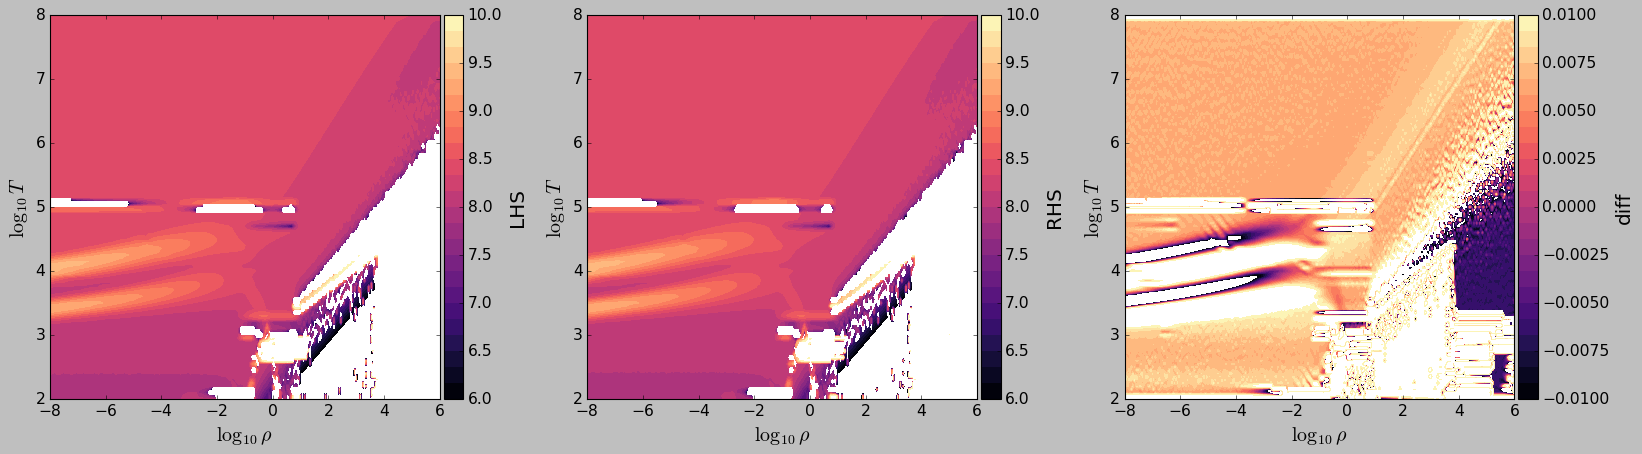

In [18]:
dE_drho, dE_dT = meos.finite_difference_single_grid(grid = cms19_H.F_Egrid, log10rhogrid = cms19_H.log10rhogrid, log10Tgrid = cms19_H.log10Tgrid)
dS_drho, dS_dT = meos.finite_difference_single_grid(grid = cms19_H.F_Sgrid, log10rhogrid = cms19_H.log10rhogrid, log10Tgrid = cms19_H.log10Tgrid)

LHS = dE_dT
RHS = dS_dT * 10**cms19_H.log10Tgrid

meos.contourf_sublots_with_colorbars(nRow=1, nCol=3, 
                                xs=cms19_H.log10rhogrid,
                                ys=cms19_H.log10Tgrid,
                                zs=[np.log10(LHS),np.log10(RHS),(LHS-RHS)/(LHS)],
                                xlims=(-8,6),
                                ylims=(2,8),
                                zlims=[(6,10),(6,10),(-1.e-2,1.e-2)],
                                levels=25,
                                xlabels=r'$\log_{10}\rho$',
                                ylabels=r'$\log_{10}T$',
                                zlabels=['LHS','RHS','diff'],
                                cmap='magma', vlines=None, hlines=None, otherlines_x=None, otherlines_y=None, 
                                species='H', plot_interpolation_lines=False, savename=None)

